# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Quizizz_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,5,2024-07-25 14:27:10,Quizizz ini sangat sangat seru buat saya lumay...
1,Pengguna Google,5,2024-07-25 13:52:50,Sangat membantu dan bermanfaat sekali untuk pe...
2,Pengguna Google,5,2024-07-25 12:32:13,Makasih
3,Pengguna Google,5,2024-07-25 10:37:05,Good
4,Pengguna Google,5,2024-07-25 08:54:30,Sangat bagus dan membantu


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,Quizizz ini sangat sangat seru buat saya lumay...
1,Sangat membantu dan bermanfaat sekali untuk pe...
2,Makasih
3,Good
4,Sangat bagus dan membantu
...,...
4995,Do you callenges me
4996,Good
4997,Ga tau
4998,Wahh bagus banget aplikasi quizz yang satu ini...


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,5000
unique,3629
top,Bagus
freq,241


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(5000, 1)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content    0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(3629, 1)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,cleaning
0,Quizizz ini sangat sangat seru buat saya lumay...,quizizz ini sangat sangat seru buat saya lumay...
1,Sangat membantu dan bermanfaat sekali untuk pe...,sangat membantu dan bermanfaat sekali untuk pe...
2,Makasih,makasih
3,Good,good
4,Sangat bagus dan membantu,sangat bagus dan membantu
...,...,...
4994,Bagus game nya bermanfaat,bagus game nya bermanfaat
4995,Do you callenges me,do you callenges me
4997,Ga tau,ga tau
4998,Wahh bagus banget aplikasi quizz yang satu ini...,wahh bagus banget aplikasi quizz yang satu ini...


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "woila" : "",
        "mendem" : "tertekan",
        "sepertiurangan" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
        "pdhl" : "padahal",
        "gaes" : "guys",
        "kelen" : "kalian",
        "grgr" : "gara gara",
        "mnta" : "minta",
        "pasilitas" : "fasilitas",
        "narutodan" : "",
        "wwconm moktar" : "",
        "ampunsaya" : "ampun saya",
        "mantapz" : "mantap",
        "dgan lyanananya" : "dengan layanannya",
        "sbn" : "saham",
        "maw" : "mau",
        "ajh" : "aja",
        "ingglish" : "ingrris",
        "callenges" : "",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,Quizizz ini sangat sangat seru buat saya lumay...,quizizz ini sangat sangat seru buat saya lumay...,quizizz ini sangat sangat seru buat saya lumay...
1,Sangat membantu dan bermanfaat sekali untuk pe...,sangat membantu dan bermanfaat sekali untuk pe...,sangat membantu dan bermanfaat sekali untuk pe...
2,Makasih,makasih,makasih
3,Good,good,good
4,Sangat bagus dan membantu,sangat bagus dan membantu,sangat bagus dan membantu
...,...,...,...
4994,Bagus game nya bermanfaat,bagus game nya bermanfaat,bagus game nya bermanfaat
4995,Do you callenges me,do you callenges me,do you me
4997,Ga tau,ga tau,ga tau
4998,Wahh bagus banget aplikasi quizz yang satu ini...,wahh bagus banget aplikasi quizz yang satu ini...,wahh bagus banget aplikasi quizz yang satu ini...


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "itu", "bisa",
                   "gak", "buat", "ke", "ga"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,Quizizz ini sangat sangat seru buat saya lumay...,quizizz ini sangat sangat seru buat saya lumay...,quizizz ini sangat sangat seru buat saya lumay...,quizizz sangat seru lumayan kasih belajar ruma...
1,Sangat membantu dan bermanfaat sekali untuk pe...,sangat membantu dan bermanfaat sekali untuk pe...,sangat membantu dan bermanfaat sekali untuk pe...,membantu bermanfaat untuk pembelajaran
2,Makasih,makasih,makasih,makasih
3,Good,good,good,good
4,Sangat bagus dan membantu,sangat bagus dan membantu,sangat bagus dan membantu,bagus membantu
...,...,...,...,...
4994,Bagus game nya bermanfaat,bagus game nya bermanfaat,bagus game nya bermanfaat,bagus game bermanfaat
4995,Do you callenges me,do you callenges me,do you me,do you me
4997,Ga tau,ga tau,ga tau,tau
4998,Wahh bagus banget aplikasi quizz yang satu ini...,wahh bagus banget aplikasi quizz yang satu ini...,wahh bagus banget aplikasi quizz yang satu ini...,wahh bagus banget aplikasi quizz satu bisa bel...


# **Tokenize**

In [18]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,Quizizz ini sangat sangat seru buat saya lumay...,quizizz ini sangat sangat seru buat saya lumay...,quizizz ini sangat sangat seru buat saya lumay...,quizizz sangat seru lumayan kasih belajar ruma...,"[quizizz, sangat, seru, lumayan, kasih, belaja..."
1,Sangat membantu dan bermanfaat sekali untuk pe...,sangat membantu dan bermanfaat sekali untuk pe...,sangat membantu dan bermanfaat sekali untuk pe...,membantu bermanfaat untuk pembelajaran,"[membantu, bermanfaat, untuk, pembelajaran]"
2,Makasih,makasih,makasih,makasih,[makasih]
3,Good,good,good,good,[good]
4,Sangat bagus dan membantu,sangat bagus dan membantu,sangat bagus dan membantu,bagus membantu,"[bagus, membantu]"
...,...,...,...,...,...
4994,Bagus game nya bermanfaat,bagus game nya bermanfaat,bagus game nya bermanfaat,bagus game bermanfaat,"[bagus, game, bermanfaat]"
4995,Do you callenges me,do you callenges me,do you me,do you me,"[do, you, me]"
4997,Ga tau,ga tau,ga tau,tau,[tau]
4998,Wahh bagus banget aplikasi quizz yang satu ini...,wahh bagus banget aplikasi quizz yang satu ini...,wahh bagus banget aplikasi quizz yang satu ini...,wahh bagus banget aplikasi quizz satu bisa bel...,"[wahh, bagus, banget, aplikasi, quizz, satu, b..."


# **Stemming**

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# df['steamming'] = df['tokenized'].apply(stemming)

# df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Quizizz_1.csv', index = False)


In [20]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Quizizz_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,quizizz sangat seru lumayan kasih ajar rumah g...
1,bantu manfaat untuk ajar
2,makasih
3,good
4,bagus bantu
...,...
3624,bagus game manfaat
3625,do you me
3626,tau
3627,wahh bagus banget aplikasi quizz satu bisa aja...


# **Translate**

In [21]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# # Load Data Hasil Stemming

# df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Quizizz_1.csv', encoding = 'latin1')


In [24]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# # Imputing NaN Values

# df_values = df_steamming.fillna(method = 'pad')
# df_values

In [27]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Quizizz_1.csv')


In [28]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Quizizz_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,quizizz sangat seru lumayan kasih ajar rumah g...,Quizizz is pretty hot. Thank you. Teach the ho...
1,bantu manfaat untuk ajar,Help me with the benefits of teaching.
2,makasih,Thank you.
3,good,good
4,bagus bantu,Good. Help.
...,...,...
3624,bagus game manfaat,Good game of benefits.
3625,do you me,do you me
3626,tau,tofu
3627,wahh bagus banget aplikasi quizz satu bisa aja...,"fontcolor="" # FFFF00""wellawella fontcolor="" # ..."


# **Labeling**

In [29]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Quizizz_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,quizizz sangat seru lumayan kasih ajar rumah g...,Quizizz is pretty hot. Thank you. Teach the ho...
1,bantu manfaat untuk ajar,Help me with the benefits of teaching.
2,makasih,Thank you.
3,good,good
4,bagus bantu,Good. Help.
...,...,...
3624,bagus game manfaat,Good game of benefits.
3625,do you me,do you me
3626,tau,tofu
3627,wahh bagus banget aplikasi quizz satu bisa aja...,"fontcolor="" # FFFF00""wellawella fontcolor="" # ..."


In [30]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [31]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [32]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 1904
Netral = 1387
Negatif = 338

Total Data Seluruhnya : 3629


In [33]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,quizizz sangat seru lumayan kasih ajar rumah g...,Quizizz is pretty hot. Thank you. Teach the ho...,Positif
1,bantu manfaat untuk ajar,Help me with the benefits of teaching.,Netral
2,makasih,Thank you.,Netral
3,good,good,Positif
4,bagus bantu,Good. Help.,Positif
...,...,...,...
3624,bagus game manfaat,Good game of benefits.,Positif
3625,do you me,do you me,Netral
3626,tau,tofu,Netral
3627,wahh bagus banget aplikasi quizz satu bisa aja...,"fontcolor="" # FFFF00""wellawella fontcolor="" # ...",Netral


In [34]:
# Mengimplementasikan Variabel Data Final

data_final = df_values

# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



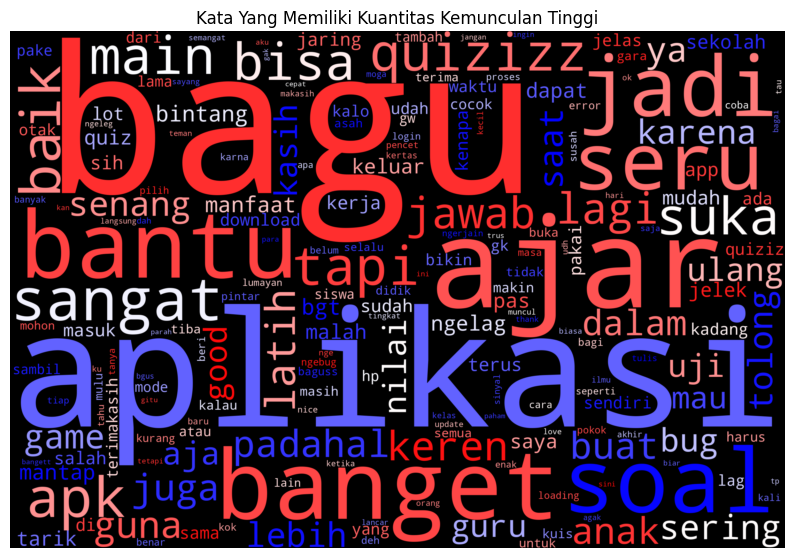

In [35]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

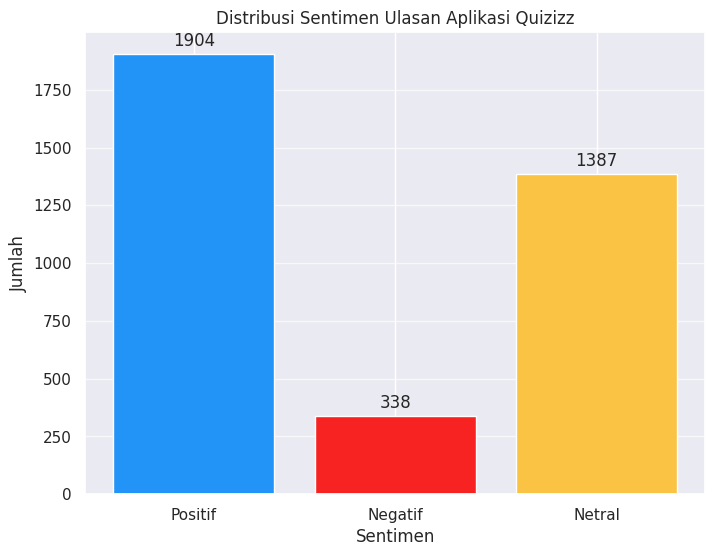

In [36]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Quizizz")

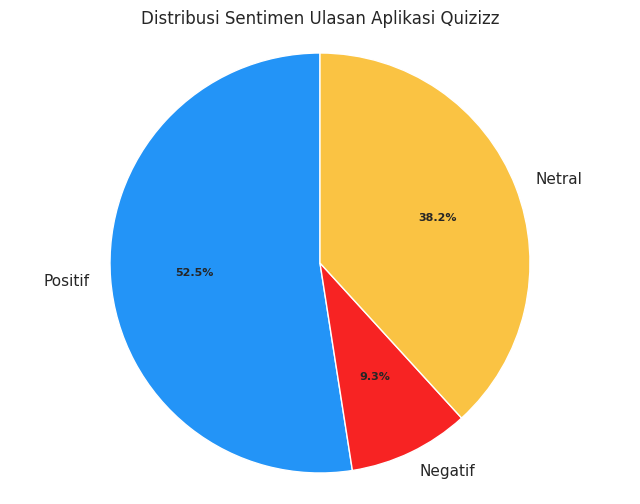

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Quizizz")

In [46]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1, 'Netral':2})
data_final

,steamming,steamming_en,sentimen
0,quizizz sangat seru lumayan kasih ajar rumah g...,Quizizz is pretty hot. Thank you. Teach the ho...,0
1,bantu manfaat untuk ajar,Help me with the benefits of teaching.,2
2,makasih,Thank you.,2
3,good,good,0
4,bagus bantu,Good. Help.,0
...,...,...,...
3624,bagus game manfaat,Good game of benefits.,0
3625,do you me,do you me,2
3626,tau,tofu,2
3627,wahh bagus banget aplikasi quizz satu bisa aja...,"fontcolor="" # FFFF00""wellawella fontcolor="" # ...",2


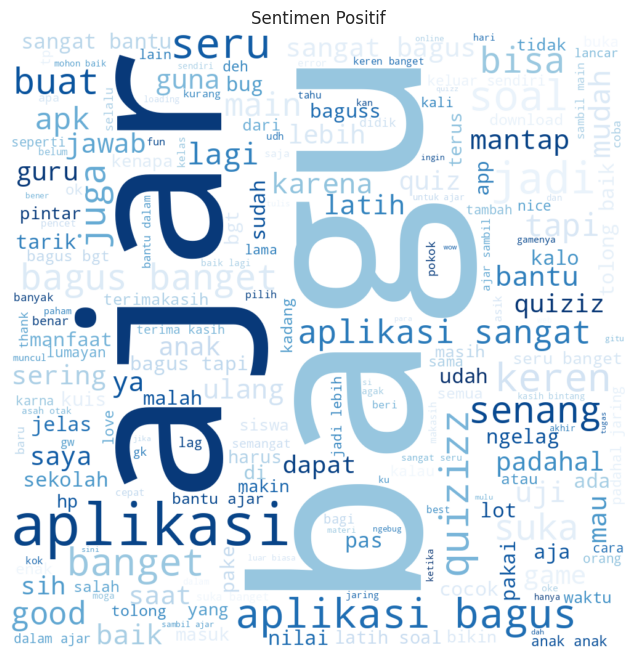

In [47]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]
data_netral = data_final[data_final['sentimen'] == 2]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

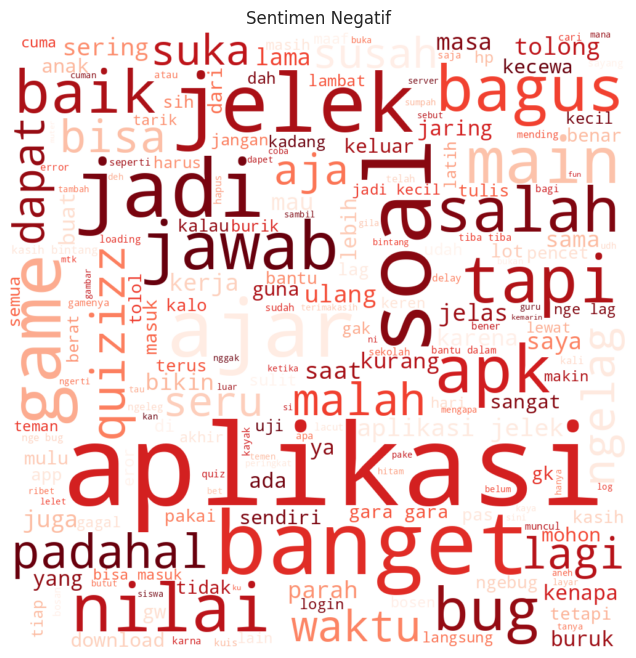

In [48]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

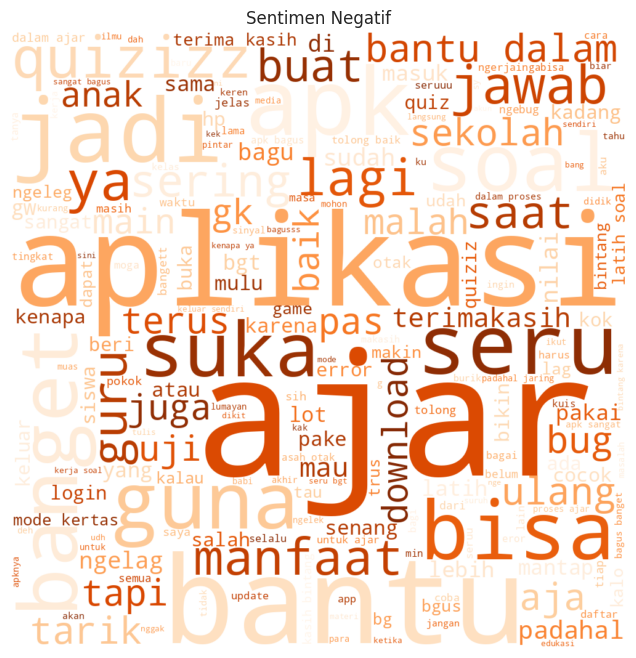

In [50]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_netral['steamming']])
wordcloud = WordCloud(colormap='Oranges', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

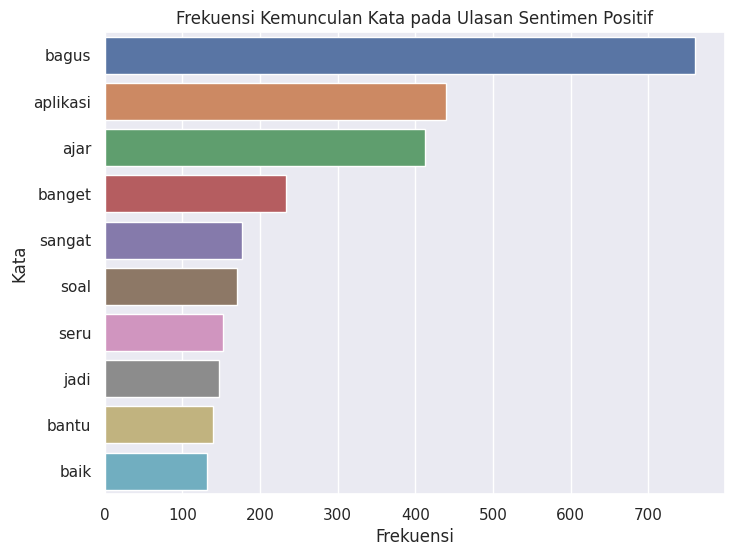

In [51]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [52]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   bagus        760
aplikasi        440
    ajar        412
  banget        234
  sangat        177
    soal        171
    seru        153
    jadi        147
   bantu        139
    baik        132


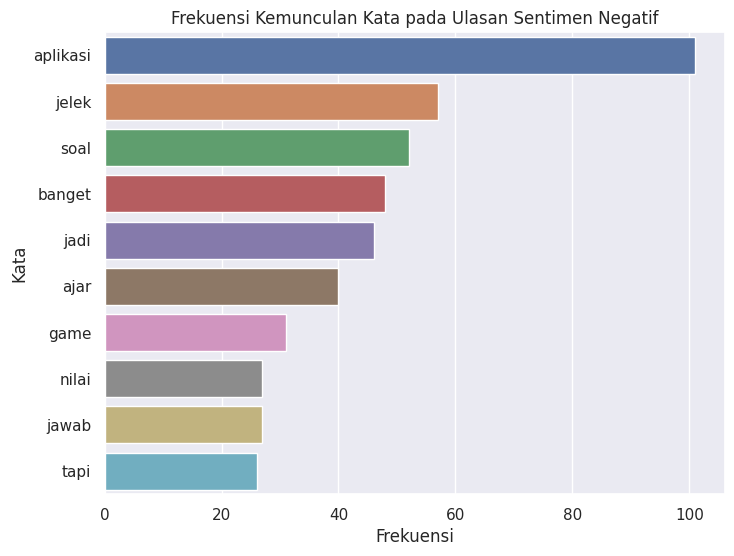

In [53]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [54]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
aplikasi        101
   jelek         57
    soal         52
  banget         48
    jadi         46
    ajar         40
    game         31
   nilai         27
   jawab         27
    tapi         26


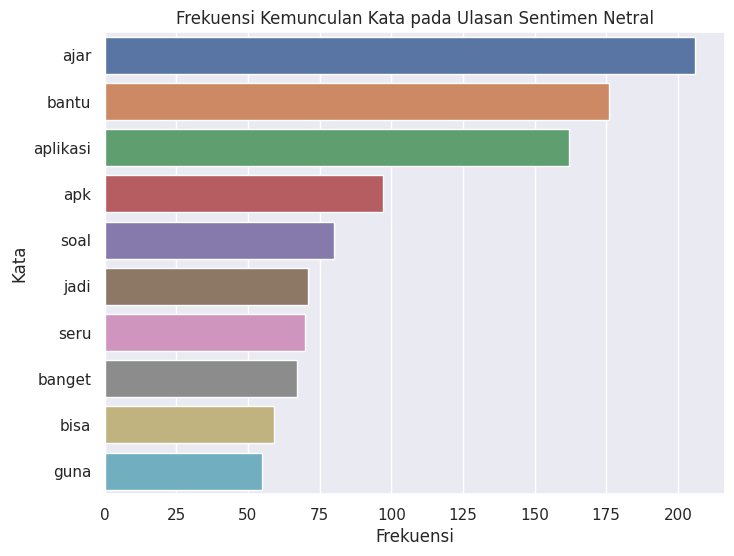

In [55]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
neutral_reviews = data_final[data_final['sentimen'] == 2]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(neutral_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_neutral = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_neutral)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Netral')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [56]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Netral : \n")
print(top_words_neutral.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Netral : 

    kata  frekuensi
    ajar        206
   bantu        176
aplikasi        162
     apk         97
    soal         80
    jadi         71
    seru         70
  banget         67
    bisa         59
    guna         55


In [57]:
# Menghitung Jumlah Sentimen Positif, Negatif, Netral

data_final['sentimen'].value_counts()

sentimen
0    1904
2    1387
1     338
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [87]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [88]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [89]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

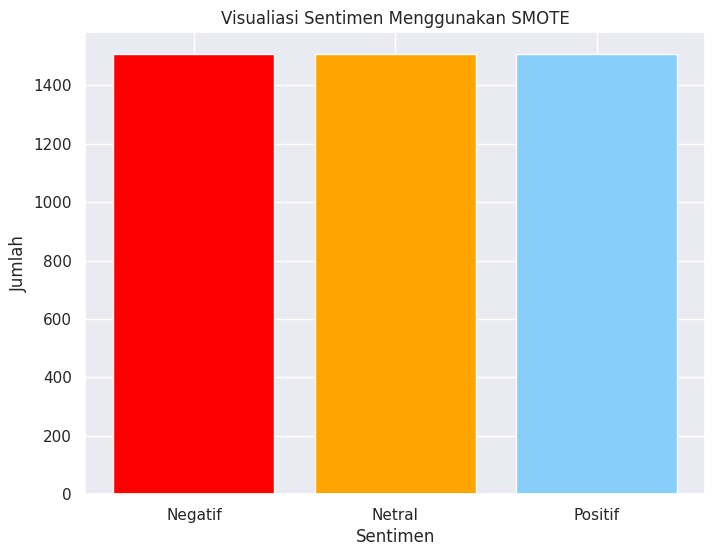

In [90]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red','orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif','Netral'])
plt.show()

# **Data Mining**

In [91]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [92]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [93]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [94]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif','Netral'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.6473829201101928

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.73      0.82      0.77       398
     Negatif       0.29      0.67      0.40        66
      Netral       0.79      0.38      0.52       262

    accuracy                           0.65       726
   macro avg       0.60      0.62      0.56       726
weighted avg       0.71      0.65      0.65       726



In [95]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[326  50  22]
 [ 18  44   4]
 [103  59 100]]

True Positives (TP) =  326

True Negatives (TN) =  44

False Positives (FP) =  50

False Negatives (FN) =  18

Accuracy =  0.6473829201101928


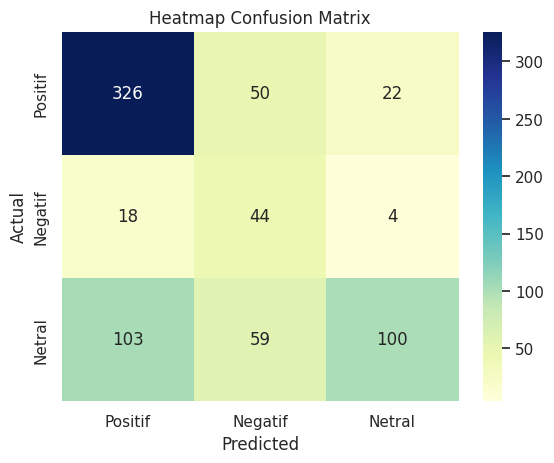

In [102]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif','Netral'],
                         index=['Positif','Negatif','Netral'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [103]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [99]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8447


In [100]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1553


# **Testing**

In [104]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 2:
    sentimen_label = "Netral"
    probability = predicted_proba[0][2] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Kecewa berat sama apk ini Waktu pengunaan pertama enak² aja,tetapi selang beberapa waktu muncul bug2 yg mengganggu Seperti soal² berukuran kecil dan pilihan ganda yg hilang dan ini mempengaruhi nilai saya.tolong devoloper segera perbaiki🙏
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 93.94%
Probabilitas: 93.94067310678687 %


In [118]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 2:
    sentimen_label = "Netral"
    probability = predicted_proba[0][2] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Aplikasi terbaik👍, tertop markotop👍 pokoknya, soal-soalnya mirib dengan soal ulangan yang diberikan guru,, jadinya mudah dalam menjawab karena sudah terlatih berkali-kali. Dan paket soalnya tidak hanya 1 tapi buanyakk buangettt.. I'm very like it,, best app
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 75.15%
Probabilitas: 75.14769004658976 %


In [111]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 2:
    sentimen_label = "Netral"
    probability = predicted_proba[0][2] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Bgus banget. Tapi waktu nyoba mode kertas sering crash aplikasinya, padahal sebelum mulai sudah dihapus cache nya, tapi tetap sama. Saat scan jawaban tiba2 keluar sendiri jadi harus scan ulang. Jadi menyita waktu & tenaga juga. Semoga bisa segera diperbaiki.
Hasil Analisis Sentimen Untuk Teks Baru: Netral
Probabilitas: 41.52%
Probabilitas: 41.52171000336923 %
